# Седов Николай ПМ22-7 Вариант 2

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [14]:


# Загрузка датасета "ERA"
dataset = fetch_openml(name='ERA', version='active')

# Получение данных и меток
X, y = dataset.data, dataset.target

# Сохранение данных и меток в CSV-файлы
X.to_csv('ERA_data.csv', index=False)
y.to_csv('ERA_target.csv', index=False)

print("Датасет успешно загружен и сохранен в локальные файлы.")


Датасет успешно загружен и сохранен в локальные файлы.


c:\Users\nsedoff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Задание 2: Основная статистическая информация о данных

In [15]:
    # Вывод основной статистической информации о данных
print("\nИнформация о датасете:")
print(dataset.DESCR)
print("\nОсновная статистическая информация о X:")
print(X.describe())
print("\nОсновная статистическая информация о y:")
print(y.describe())



Информация о датасете:
**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

1. Title: Employee Rejection\Acceptance  (Orinal ERA)

2. Source Informaion:
Donor: Arie Ben David
MIS, Dept. of Technology Management
Holon Academic Inst. of Technology
52 Golomb St.
Holon 58102
Israel
abendav@hait.ac.il
Owner: Yoav Ganzah
Business Administration School
Tel Aviv Univerity
Ramat Aviv 69978
Israel

3. Past Usage:

4. Relevant Information
The ERA data set was originally gathered during an academic decision-making
experiment aiming at determining which are the most important qualities of
candidates for a certain type of jobs. Unlike the ESL data set (enclosed)
which was collected from expert recruiters, this data set was collected
during a MBA academic course.
The input in the data set are features of a candidates such as past
experience, verbal skills, etc., and the output is the subjective judgment of
a decision-maker to which degree he or she tends to accept the applicant t

# Задание 3: Типы данных каждого признака и целевой переменной

In [16]:
# Загрузка данных
data = X  # Укажите правильный путь к файлу данных
target = y  # Укажите правильный путь к файлу целевой переменной

# Добавление целевой переменной в датасет
data['target'] = target

# Вывод типов данных признаков и целевой переменной
print("Типы данных признаков и целевой переменной:")
print(data.dtypes)

# Поиск нечисловых колонок
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("\nНечисловые колонки:", non_numeric_columns)

# Удаление нечисловых колонок
data = data.drop(columns=non_numeric_columns)

# Вывод типов данных после удаления нечисловых колонок
print("\nТипы данных после удаления нечисловых колонок:\n", data.dtypes)


Типы данных признаков и целевой переменной:
in1       float64
in2       float64
in3       float64
in4       float64
target    float64
dtype: object

Нечисловые колонки: Index([], dtype='object')

Типы данных после удаления нечисловых колонок:
 in1       float64
in2       float64
in3       float64
in4       float64
target    float64
dtype: object


# Задание 4: Обработка пропущенных значений


In [17]:

# Загрузка данных
data = X  # Укажите правильный путь к файлу данных
target = y  # Укажите правильный путь к файлу целевой переменной

# Добавление целевой переменной в датасет
data['target'] = target

# Проверка на наличие пропущенных значений
print("Количество пропущенных значений до обработки:")
print(data.isnull().sum())

# Заполнение пропущенных значений медианными значениями
data = data.fillna(data.median())

# Проверка на наличие пропущенных значений после обработки
print("\nКоличество пропущенных значений после обработки:")
print(data.isnull().sum())


Количество пропущенных значений до обработки:
in1       0
in2       0
in3       0
in4       0
target    0
dtype: int64

Количество пропущенных значений после обработки:
in1       0
in2       0
in3       0
in4       0
target    0
dtype: int64


# Задание 5: Гистограмма распределения целевой переменной

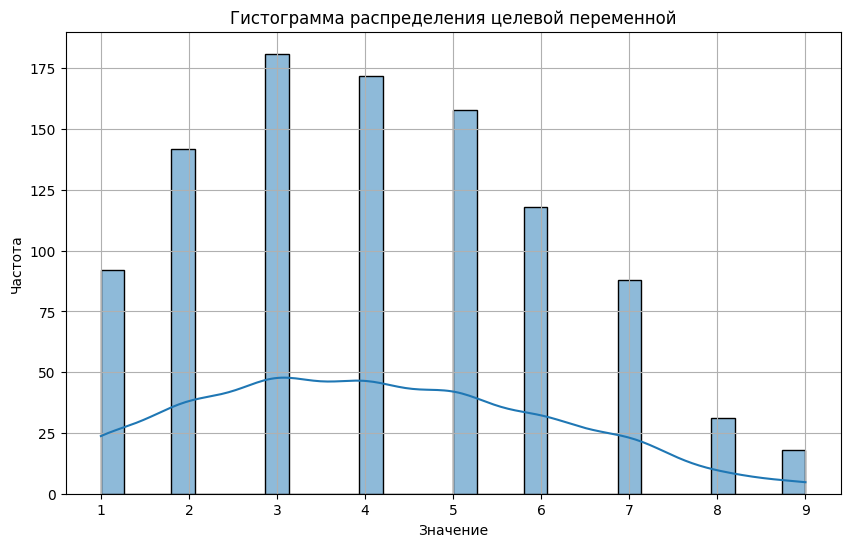


Пояснение к распределению:
Гистограмма показывает распределение целевой переменной. По графику можно предположить, что распределение близко к нормальному, однако, возможно, имеются некоторые асимметрия и выбросы. Для более точной оценки проведем доп. анализ.

Результат анализа QQ-plot:
Наклон (slope): 1.94
Пересечение (intercept): 4.13
Коэффициент корреляции (r): 0.98
Распределение вероятно нормальное.


In [18]:
import scipy.stats as stats

# Построение гистограммы распределения целевой переменной
plt.figure(figsize=(10, 6))

# Убедимся, что y является одномерным массивом
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

sns.histplot(y, bins=30, kde=True)
plt.title('Гистограмма распределения целевой переменной')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Пояснение к распределению
print("\nПояснение к распределению:")
print("Гистограмма показывает распределение целевой переменной. По графику можно предположить, что распределение близко к нормальному, однако, возможно, имеются некоторые асимметрия и выбросы. Для более точной оценки проведем доп. анализ.")

# Анализ QQ-plot
_, (slope, intercept, r) = stats.probplot(y, plot=None)
print("\nРезультат анализа QQ-plot:")
print(f"Наклон (slope): {slope:.2f}")
print(f"Пересечение (intercept): {intercept:.2f}")
print(f"Коэффициент корреляции (r): {r:.2f}")

if r > 0.99:
    print("Распределение близко к нормальному.")
elif r > 0.95:
    print("Распределение вероятно нормальное.")
else:
    print("Распределение отличается от нормального.")


# Задание 6: Обучение модели линейной регрессии (своей реализацией)

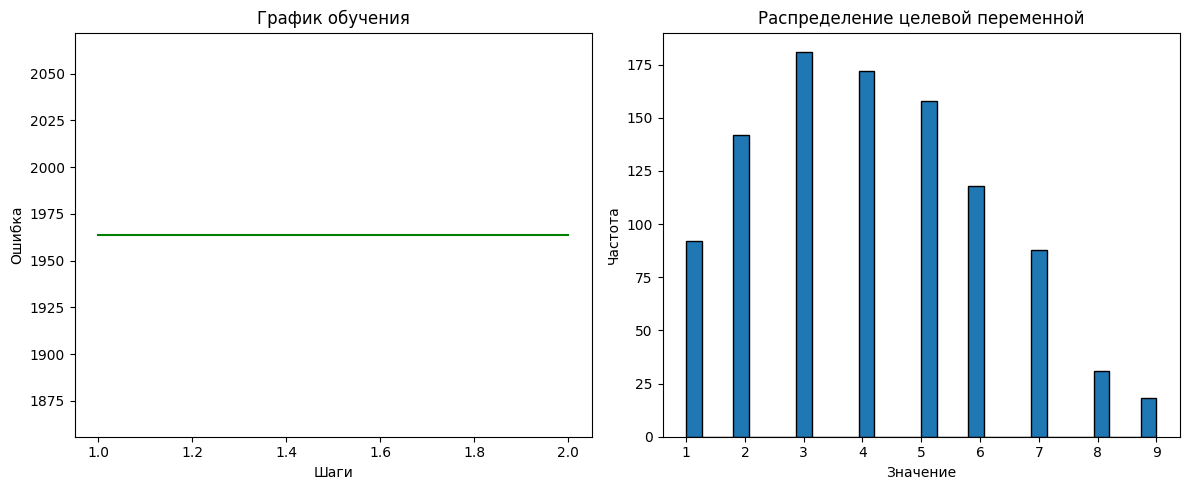


Уравнение гиперплоскости (собственная реализация):
y = 4.13 + 0.00x1 + 0.00x2 + -0.00x3 + -0.00x4


In [19]:
# Класс модели линейной регрессии
class LinearRegressionCustom:
    def __init__(self):
        self.b0 = 0
        self.bs = []

    def predict(self, X):
        X = np.array(X)
        bs = np.array(self.bs)
        return self.b0 + np.dot(X, bs)

    def error(self, X, Y):
        Y_pred = self.predict(X)
        return np.sum((Y_pred - Y) ** 2) / (2 * len(Y))

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=10000):
        Y = np.array(Y)
        steps, errors = [], []
        step = 0
        self.bs = [0] * X.shape[1]
        
        for _ in range(max_steps):
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            self.b0 -= alpha * dJ0
            
            for i in range(len(self.bs)):
                dJi = np.sum((self.predict(X) - Y) * X[:, i]) / len(Y)
                self.bs[i] -= alpha * dJi
            
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            
            if step > 1:
                if abs(errors[-2] - errors[-1]) < accuracy:
                    break
                if errors[-1] - errors[-2] > 0:
                    alpha /= 2

        return steps, errors
    
    def graph(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=10000):
        steps, errors = self.fit(X, Y, alpha, accuracy, max_steps)
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(steps, errors, 'g')
        plt.title('График обучения')
        plt.xlabel('Шаги')
        plt.ylabel('Ошибка')
        
        plt.subplot(1, 2, 2)
        plt.hist(Y, bins=30, edgecolor='k')
        plt.title('Распределение целевой переменной')
        plt.xlabel('Значение')
        plt.ylabel('Частота')

        plt.tight_layout()
        plt.show()

# Загрузка данных
data = pd.read_csv('ERA_data.csv')
target = pd.read_csv('ERA_target.csv')

# Добавление целевой переменной в датасет
data['target'] = target

# Проверка на наличие нечисловых колонок и их удаление
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
data = data.drop(columns=non_numeric_columns)

# Заполнение пропущенных значений медианными значениями
data = data.fillna(data.median())

# Разделение данных на признаки и целевую переменную
X = data.drop(columns='target')
y = data[['target']]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение модели линейной регрессии
model = LinearRegressionCustom()
model.graph(X_scaled, y.values)

# Вывод уравнения гиперплоскости
weights = model.bs
bias = model.b0
print("\nУравнение гиперплоскости (собственная реализация):")
print("y = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3 + {:.2f}x4".format(bias, *weights))

# Задание 7: Обучение модели линейной регрессии (sklearn)

In [21]:

# Обучение модели линейной регрессии из sklearn
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_scaled, y.values)

# Вывод уравнения гиперплоскости (sklearn)
weights_sklearn = lin_reg_sklearn.coef_.flatten()  # Преобразование в одномерный массив
bias_sklearn = lin_reg_sklearn.intercept_[0]  # Извлечение скалярного значения
print("\nУравнение гиперплоскости (sklearn):")
print("y = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3 + {:.2f}x4".format(bias_sklearn, *weights_sklearn))



Уравнение гиперплоскости (sklearn):
y = 4.13 + 0.71x1 + 0.91x2 + 0.43x3 + 0.24x4
